In [2]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy as np
import seaborn
import scipy
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

seaborn.set_style('whitegrid')
seaborn.set_context('talk')
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [3]:
dataset[:3]

area    organismo_origen  via_acceso      año     provincia  \
0  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00  Buenos Aires   
1  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00  Buenos Aires   
2  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00  Buenos Aires   

                   contexto                                  contexto1  \
0  Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
1  Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
2  Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   

  circunstancia                                        alojamiento  \
0           NaN                                                NaN   
1           NaN  Malas condiciones de alojamiento (higiene), Hu...   
2           NaN         Malas condiciones de alojamiento (higiene)   

  violencia_fisica violencia_psiquica violencia_genero  \
0              NaN                NaN              NaN   
1              NaN                NaN              NaN   
2              NaN                NaN              NaN   

                     violencia_salud  resumen_hecho  \
0  Denegación acceso atención médica            NaN   
1  Denegación acceso atención médica            NaN   
2                                NaN            NaN   

             descripcion_institucion         establecimiento  Unnamed: 16  
0  Servicio Penitenciario Provincial         UPP Nº 13 Junin          NaN  
1  Servicio Penitenciario Provincial      UPP Nº 13 DE JUNIN          NaN  
2  Servicio Penitenciario Provincial  UPP Nº 36 de Magdalena          NaN

Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [4]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return float(row.split(',')[0])
        return row
    
def convert_esdependenciadefuezadeseguridad(c):
    s = str(c)
    ispenal = s.find("Penal")
    iscomisaria = s.find("Comisaría")
    if (ispenal >= 0 or iscomisaria >= 0):
        return "dependencia de una fuerza de seguridad"
    else:
        return "otros"

def tiene_campo(c):
    if (pandas.isnull(c)):
        return "NO"
    else:
        return "SI"
    
dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)

# Se podrían también decodicar los nombres de provincias
#dataset.dropna(axis=0, subset=['provincia'])
#dataset = dataset.query('year != "NaN"')
#display(len(dt2))
#Tabla de frecuencia de probabilidades relacionando las Variables Provincia / Year
# Pulido de Datos... se quitan filas donde Provincia o Year son NaN

#Total Sin pulido
print("Total datos sin pulido: " + str(len(dataset)))
dataset = dataset.dropna(axis=0, subset=['provincia'])
print("Total sin provincias NaN: " + str(len(dataset)))
dataset = dataset.dropna(axis=0, subset=['year'])
print("Total sin year NaN: " + str(len(dataset)))

dataset.loc[:,'es_dfp'] = dataset[u'contexto1'].apply(convert_esdependenciadefuezadeseguridad)

dataset.loc[:,'tuvo_vfisica'] = dataset[u'violencia_fisica'].apply(tiene_campo)
dataset.loc[:,'tuvo_vpsiquica'] = dataset[u'violencia_psiquica'].apply(tiene_campo)



Total datos sin pulido: 1439
Total sin provincias NaN: 1408
Total sin year NaN: 1305


In [5]:
dataset[:41]

area    organismo_origen  via_acceso      año               provincia  \
0   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
1   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
2   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
3   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
4   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
5   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
6   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
7   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
8   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
9   DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
10  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
11  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
12  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
13  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
14  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
15  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
16  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
17  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
18  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
19  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
20  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
21  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
22  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00     Santiago del Estero   
23  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
24  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
25  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00  Ciudad de Buenos Aires   
26  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
27  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
28  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
29  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
30  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
31  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
32  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
33  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00                  Chubut   
34  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
35  DNPCVI  SECRETARIA DE DDHH  Telefónica  2016,00                 Córdoba   
36  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
37  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
38  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   
39  DNPCVI                Otro       Otros  2017,00  Ciudad de Buenos Aires   
40  DNPCVI  SECRETARIA DE DDHH  Telefónica  2017,00            Buenos Aires   

                    contexto                                  contexto1  \
0   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
1   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
2   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
3   Situaciones de Detención                                  Comisaría   
4   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
5   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
6   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
7   Situaciones de Detención  Penal / Complejo Penitenciario PROVINCIAL   
8   Situacio

In [6]:
dataset.shape, dataset.year.dropna().shape

((1305, 21), (1305,))

Ejercicio 1
Crear una imagen mostrando la distribución de los eventos por año

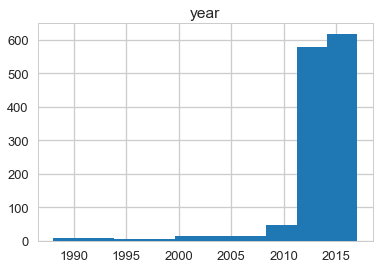

In [7]:
#result = numpy.unique(dataset.year, return_counts=True)
#print(result) 
#seaborn.countplot(dataset.year, color='#2ecc71', orient="h")
#seaborn.despine()
#seaborn.distplot(dataset.year);
dataset.hist(column="year", bins=10);


Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

In [8]:
tablaDistProb = dataset.year.value_counts(normalize=True)
display(tablaDistProb)
#tablaDistProb[:3]


2016.0    0.227586
2013.0    0.214559
2014.0    0.181609
2017.0    0.179310
2015.0    0.066667
2012.0    0.046743
2010.0    0.016092
2011.0    0.012261
2009.0    0.007663
2003.0    0.006897
2002.0    0.005364
2007.0    0.003831
1990.0    0.003831
2008.0    0.003831
1991.0    0.003831
2000.0    0.002299
1994.0    0.002299
2006.0    0.002299
2005.0    0.002299
2001.0    0.002299
1993.0    0.001533
1998.0    0.001533
2004.0    0.001533
1989.0    0.000766
1996.0    0.000766
1997.0    0.000766
1999.0    0.000766
1988.0    0.000766
Name: year, dtype: float64

Crear una imagen de dichas probabilidades con el gráfico que considere adecuado

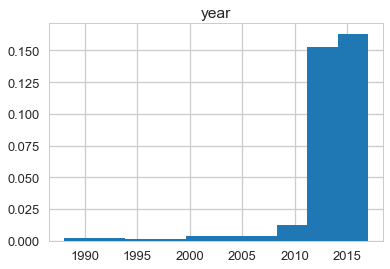

In [9]:
dataset.hist(column="year", bins=10, normed=True);

**¿Son ambos gráficos iguales?** 
Reflejan la misma tendecian, sin embargo, el segundo refleja una probabilidad propiamente dicha y el primero solo expresa los registros de violencia institucional.


**¿Cuál considera que es más útil? **
Ambos los son.

**¿A qué se debe la forma de la distribución? **
Indica un aumento de los eventos en los últimos años.

**¿Qué tendencia muestra? **
Un incremento de la probabilidad de eventos de violencia institucional en los últimos años.

**¿Ha aumentado la violencia institucional en los últimos años?**
Si.

**Calcular la función de distribución acumulada de la variable Y y graficarla. **

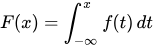


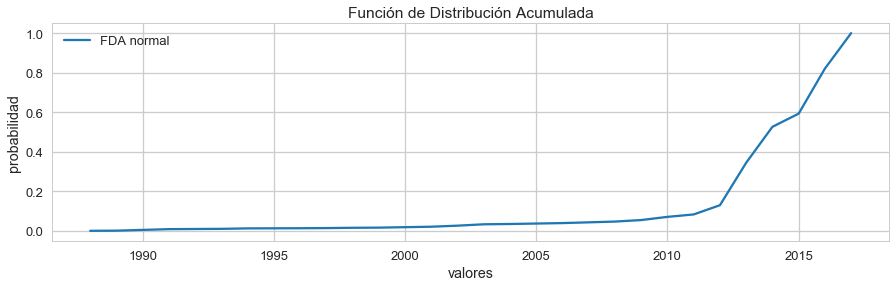

In [10]:
# Graficando Función de Distribución Acumulada con Python
x_1 = tablaDistProb
#Ordenamos la Serie por Año (Index)
x_1_sorteado = x_1.sort_index() 
#display(x_1_sorteado)
# Acumulamos las probabilidades de cada Index sumarizando las mismas.
y = np.cumsum(x_1_sorteado.values);
#display(y)

plt.figure(figsize=(15,4)) #Fijar el ancho del grafico
#Alimentamos el plot con las Keys de la Serie (eje x) y la frecuencia acumulada (eje y)
plt.plot(x_1_sorteado.keys(), y, label='FDA normal') 
#Setear Titulo, nombre del eje y, nombre del eje x y la ubicación de la leyenda
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=2)


¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?
Suponiendo que el cambio de Gobierno ocurre en 2015, la probabilidad sería de 0,6

# Ejercicio 2
**Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’**

In [11]:
tablaDistProbProvincias = dataset.provincia.value_counts(normalize=True)

display(tablaDistProbProvincias.to_frame())

provincia
Buenos Aires             0.685057
Ciudad de Buenos Aires   0.085824
Córdoba                  0.039847
Chubut                   0.026054
Chaco                    0.022222
Rio Negro                0.019157
Santa Fe                 0.014559
Neuquen                  0.014559
Salta                    0.012261
Mendoza                  0.012261
Misiones                 0.008429
Formosa                  0.007663
Santiago del Estero      0.007663
La Pampa                 0.007663
Tucuman                  0.006897
Entre Rios               0.006897
Jujuy                    0.005364
La Rioja                 0.004598
Corrientes               0.003065
Santa Cruz               0.003065
San Juan                 0.002299
San Luis                 0.002299
Tierra del Fuego         0.001533
Catamarca                0.000766

**¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?**
No se???

** Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información? ** 

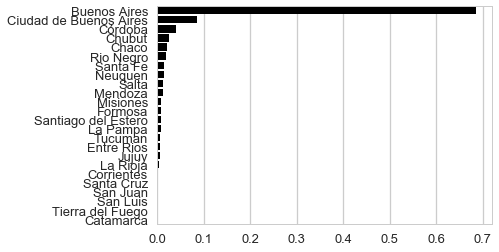

In [12]:
seaborn.barplot(tablaDistProbProvincias.values,tablaDistProbProvincias.index,color="black")


# Ejercicio 3
** Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores. ¿Son eventos independientes? **

In [41]:
#Relaciona dos variables categoricas en una misma tabla //Tabla de contingencia provincia y Year
dfNN = pandas.crosstab(index=dataset["provincia"], columns=dataset["year"], margins=False)

In [42]:
#Relaciona dos variables categoricas en una misma tabla //Tabla de contingencia provincia y Year
df = pandas.crosstab(index=dataset["provincia"], columns=dataset["year"], margins=False, normalize=True)#.apply(lambda r: r/len(dataset))
display(df)

year                      1988.0    1989.0    1990.0    1991.0    1993.0  \
provincia                                                                  
Buenos Aires            0.000000  0.000766  0.000000  0.002299  0.000000   
Catamarca               0.000000  0.000000  0.000000  0.000000  0.000000   
Chaco                   0.000000  0.000000  0.003065  0.000000  0.000000   
Chubut                  0.000000  0.000000  0.000000  0.000000  0.000000   
Ciudad de Buenos Aires  0.000766  0.000000  0.000000  0.001533  0.000000   
Corrientes              0.000000  0.000000  0.000000  0.000000  0.000000   
Córdoba                 0.000000  0.000000  0.000000  0.000000  0.000000   
Entre Rios              0.000000  0.000000  0.000000  0.000000  0.000000   
Formosa                 0.000000  0.000000  0.000000  0.000000  0.000000   
Jujuy                   0.000000  0.000000  0.000000  0.000000  0.000000   
La Pampa                0.000000  0.000000  0.000000  0.000000  0.000000   
La Rioja                0.000000  0.000000  0.000000  0.000000  0.000000   
Mendoza                 0.000000  0.000000  0.000766  0.000000  0.000000   
Misiones                0.000000  0.000000  0.000000  0.000000  0.000000   
Neuquen                 0.000000  0.000000  0.000000  0.000000  0.000000   
Rio Negro               0.000000  0.000000  0.000000  0.000000  0.000000   
Salta                   0.000000  0.000000  0.000000  0.000000  0.000000   
San Juan                0.000000  0.000000  0.000000  0.000000  0.000000   
San Luis                0.000000  0.000000  0.000000  0.000000  0.001533   
Santa Cruz              0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Fe                0.000000  0.000000  0.000000  0.000000  0.000000   
Santiago del Estero     0.000000  0.000000  0.000000  0.000000  0.000000   
Tierra del Fuego        0.000000  0.000000  0.000000  0.000000  0.000000   
Tucuman                 0.000000  0.000000  0.000000  0.000000  0.000000   

year                      1994.0    1996.0    1997.0    1998.0    1999.0  \
provincia                                                                  
Buenos Aires            0.000766  0.000000  0.000000  0.000000  0.000000   
Catamarca               0.000000  0.000000  0.000000  0.000000  0.000000   
Chaco                   0.000000  0.000000  0.000000  0.000000  0.000000   
Chubut                  0.000000  0.000000  0.000000  0.000000  0.000000   
Ciudad de Buenos Aires  0.000000  0.000766  0.000766  0.000766  0.000000   
Corrientes              0.000000  0.000000  0.000000  0.000000  0.000000   
Córdoba                 0.000000  0.000000  0.000000  0.000000  0.000000   
Entre Rios              0.000000  0.000000  0.000000  0.000000  0.000000   
Formosa                 0.000000  0.000000  0.000000  0.000000  0.000000   
Jujuy                   0.000000  0.000000  0.000000  0.000000  0.000000   
La Pampa                0.000000  0.000000  0.000000  0.000000  0.000000   
La Rioja                0.000000  0.000000  0.000000  0.000000  0.000766   
Mendoza                 0.000000  0.000000  0.000000  0.000000  0.000000   
Misiones                0.000000  0.000000  0.000000  0.000000  0.000000   
Neuquen                 0.000766  0.000000  0.000000  0.000766  0.000000   
Rio Negro               0.000000  0.000000  0.000000  0.000000  0.000000   
Salta                   0.000000  0.000000  0.000000  0.000000  0.000000   
San Juan                0.000000  0.000000  0.000000  0.000000  0.000000   
San Luis                0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Cruz              0.000000  0.000000  0.000000  0.000000  0.000000   
Santa Fe                0.000766  0.000000  0.000000  0.000000  0.000000   
Santiago del Estero     0.000000  0.000000  0.000000  0.000000  0.000000   
Tierra del Fuego        0.000000  0.000000  0.000000  0.000000  0.000000   
Tucuman                 0.000000  0.000000  0.000000  0.000000  0.000000   

year                      ...       2008.0    

** Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. **

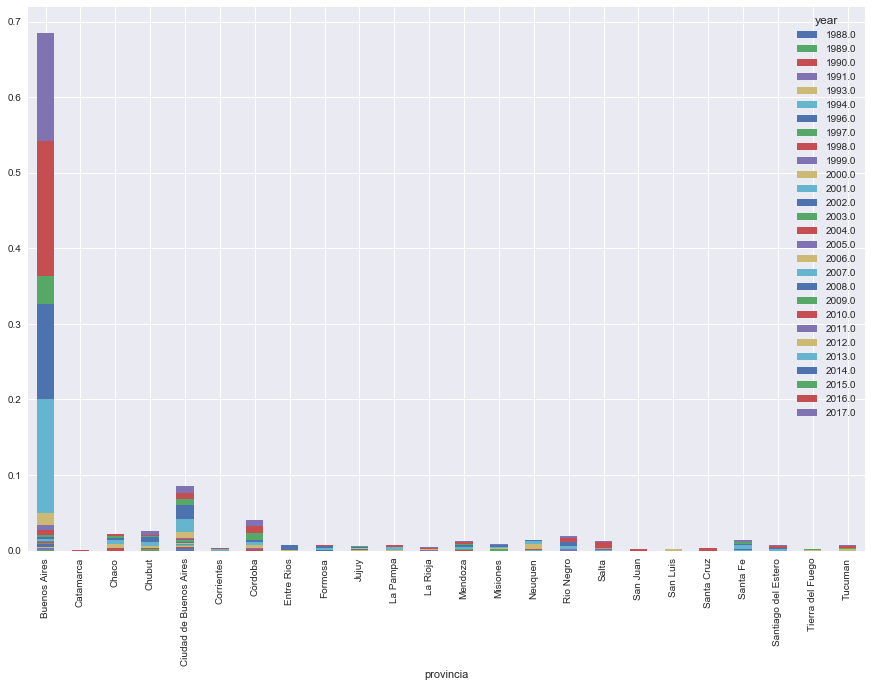

In [43]:
df.plot(kind="bar", stacked=True, figsize=(15, 10) )

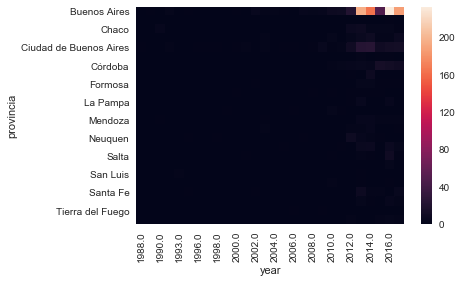

In [44]:
seaborn.set()

seaborn.heatmap(dfNN)

# Ejercicio 4
** Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc) **

In [40]:
sEsDependenciaDeFuerzaDeSeguridad = dataset.es_dfp.value_counts(normalize=True)
display(sEsDependenciaDeFuerzaDeSeguridad)

dependencia de una fuerza de seguridad    0.75249
otros                                     0.24751
Name: es_dfp, dtype: float64

# Ejercicio 5
** Dada la variable aleatoria M = ‘existió violencia física’: **

** ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’ **

In [25]:
df2 = pandas.crosstab(index=dataset["tuvo_vfisica"], columns=dataset["tuvo_vpsiquica"], margins=True,normalize=True)#.apply(lambda r: r/len(dataset))
display(df2)
#chi2_contingency(df2)

tuvo_vpsiquica        NO        SI       All
tuvo_vfisica                                
NO              0.331034  0.247510  0.578544
SI              0.335632  0.085824  0.421456
All             0.666667  0.333333  1.000000

Como sabemos que la formula de calculo de la propabilidad condicionada es:



P(A|B)= 0.085824 / 0.335632 = 0.253968


** ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos? **
Datos los datos probabilisticos se observa una dependencia entre las variables analizadas, ya que generalmente cuando existe violencia fisica, tambien existe violencia psiquica

**¿Podemos concluir en que son eventos independientes dadas las muestras?**

Para verificar la independencia de las variables realizamos el siguiente calculo

** 0.333333 * 0.421456 = 0,1404851 != 0.085824 **

La frecuencia relativa de cada casilla no es igual al producto de las marginales relativas correspondientes, por lo tanto, las variables son dependientes: